### 데이터 준비

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0047/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [5]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0047/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


In [6]:
# 바위 이미지가 저장된 디렉토import os
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")


이미지 디렉토리 경로:  /home/aiffel0047/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [7]:
# 데이터 로드하기

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1741   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) =load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1741 입니다.
x_train shape: (1741, 28, 28, 3)
y_train shape: (1741,)


라벨:  0


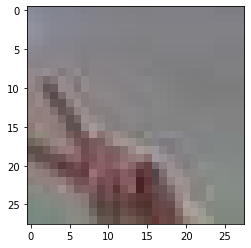

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(8, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                6432      
_________________________________________________________________
dense_3 (Dense)              (

### 학습시키기

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
55/55 [==============================] - 4s 73ms/step - loss: 1.0961 - accuracy: 0.3596
Epoch 2/10
55/55 [==============================] - 0s 1ms/step - loss: 1.0710 - accuracy: 0.4578
Epoch 3/10
55/55 [==============================] - 0s 1ms/step - loss: 1.0014 - accuracy: 0.5095
Epoch 4/10
55/55 [==============================] - 0s 1ms/step - loss: 0.9254 - accuracy: 0.5750
Epoch 5/10
55/55 [==============================] - 0s 1ms/step - loss: 0.8521 - accuracy: 0.6324
Epoch 6/10
55/55 [==============================] - 0s 1ms/step - loss: 0.8031 - accuracy: 0.6640
Epoch 7/10
55/55 [==============================] - 0s 1ms/step - loss: 0.7394 - accuracy: 0.6973
Epoch 8/10
55/55 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.7295
Epoch 9/10
55/55 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.7559
Epoch 10/10
55/55 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.7800


In [13]:

# 테스트 데이터 로드하기

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=303   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test) =load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (303, 28, 28, 3)
y_test shape: (303,)


In [12]:
# test_accuracy 측정

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

NameError: name 'x_test_reshaped' is not defined

In [170]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=20  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9999678e-01 2.5531106e-06 7.1405424e-07]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


## Reporting Note

데이터 준비까지는 학습 자료를 따라 차근차근 따라왔으나 문제는 웹캠이 작동하지 않을 때 부터 발생했습니다. 컴퓨터에 저장되어 있는 기존 사진 파일을 통해 계속 진행하는 방법과 코치님의 도움으로 다시 진행할 수 있었습니다. 데이터 설계에서 계속 정확도 1.00이 발생하여 모든 코드를 일일이 점검한 결과, 사진 개수에서 오타를 냈다는 사실을 알고 수정했습니다. 테스트 데이터를 통해 모델 성능을 평가하자 20%가 채 안되는 결과가 나와 설계에 들어가는 수치를 2시간 동안 고쳐 겨우 40%를 넘겼습니다. 그런데 새로고침을 하니 또 다시 30% 대로 내려왔습니다. 알고 보니 학습 데이터셋과 테스트 데이터셋의 사진이 너무 다른 게 원인이었습니다. 폴더 별로 사진을 섞다 사진 이름이 섞이는 바람에 수정하려면 시간이 더 걸릴 것 같습니다. 과연 시간 안에 낼 수 있을지 걱정이 됩니다. 

그리고 마침내 정확도 70%를 넘겼습니다!